In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
baseline_data_1 = np.loadtxt('/Users/SophieA/Desktop/GTC-Neuroscience/neural-modeling-ws23/task2_data/baseline/task2_baseline1.csv', delimiter=',')
baseline_data_2 = np.loadtxt('/Users/SophieA/Desktop/GTC-Neuroscience/neural-modeling-ws23/task2_data/baseline/task2_baseline2.csv', delimiter=',')

interference_data_1 = np.loadtxt('/Users/SophieA/Desktop/GTC-Neuroscience/neural-modeling-ws23/task2_data/interference_b1/task2.csv', delimiter=',')
interference_data_2 = np.loadtxt('/Users/SophieA/Desktop/GTC-Neuroscience/neural-modeling-ws23/task2_data/interference_b2/task2.csv', delimiter=',')

In [4]:
baseline_data_1[0]

array([        nan, -5.19442891, -4.13918926, -1.81830296,  0.19291435,
        4.701245  , -0.75137698, -0.95484125,  0.        ,  2.44063793,
        3.30186567,  0.72752635, -1.48786753,         nan, -2.62812546,
        5.14459206,  0.97764879,  0.        ,  1.54294757, -1.36392753,
        1.51741413,  2.90776286,  0.18423017,  1.66295874, -0.95803411,
        1.54294757,  1.34112778, -1.74156485,  0.57872557, -2.04540849,
        2.44865658,  3.94518623,  2.15431134, -0.18972043,         nan,
        2.01920715, -1.33221985,  1.69576132, -1.72988362, -0.55625223,
               nan, -0.46554492,  4.69862137,  2.4327925 ,         nan,
               nan,  7.3657608 ,  0.98341566, -2.02466822,  7.61986495,
        3.18547676,  7.56860733,  0.11347306,  5.54046301,  1.45109903,
        1.53679208, 23.77417094,  1.87347065, 11.62275083, 13.74620996,
       -4.57222538,  1.89554592,  5.26380082, 12.46550009, 15.82946979,
        2.61436226, 10.54948679, -1.72935612, -0.63858534, -2.67

In [5]:
timestamps_baseline = [1,40,80,120,160,200]
timestamps_interference = [1,20,60,80,100,140,160,180,220,240]

In [20]:
len(timestamps_baseline)

6

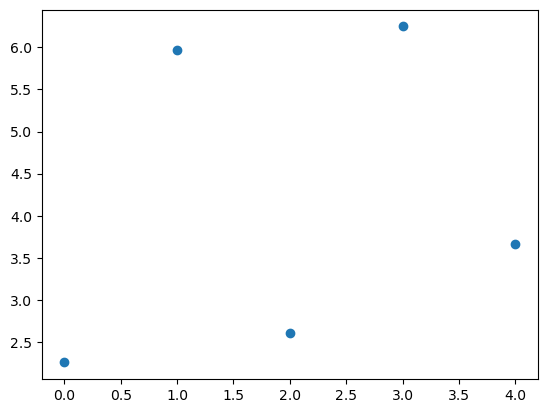

In [6]:
# analysis of the baseline movement variabilities: 

error_segments = []
mean_values = []
median_values = []
mov_var_list = []
quartile_list = []

# Loop to create segments and calculate mean error angle and movement variability

for i in range(len(timestamps_baseline) - 1):

    start_index = int(timestamps_baseline[i])
    end_index = int(timestamps_baseline[i + 1])
    segment = baseline_data_1[0, start_index:end_index]
    segment = np.array(segment)

    mean_value_seg = np.nanmean(segment)
    mov_var_seg = np.nanstd(segment)
    median_seg = np.nanmedian(segment)
    
    error_segments.append(segment)
    mean_values.append(mean_value_seg)
    median_values.append(median_seg)
    mov_var_list.append(mov_var_seg)

mov_var_list_baseline1 = mov_var_list

plt.plot(mov_var_list_baseline1, 'o')
plt.show()



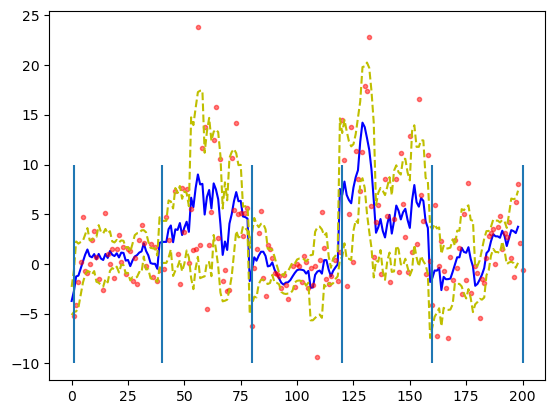

In [32]:
window_size = 3 #window size captures how many points are taken into account on each side of the data pt. to be smoothed
smoothed_baseline1_list = []
running_variances_basel1_list = []

for i in range(len(timestamps_baseline)-1):
    for t in range(timestamps_baseline[i],timestamps_baseline[i+1]):
        real_window_min = max([timestamps_baseline[i], t-window_size])
        real_window_max = min([timestamps_baseline[i+1],t+window_size])
    
        smoothed_baseline1 = np.nanmean(baseline_data_1[0,real_window_min:real_window_max])
        smoothed_baseline1_list.append(smoothed_baseline1)
        
        running_variance_basel1 = np.nanstd(baseline_data_1[0,real_window_min:real_window_max])
        running_variances_basel1_list.append(running_variance_basel1)

mplusv_basel1 = np.array(smoothed_baseline1_list) + np.array(running_variances_basel1_list)
mminusv_basel1 = np.array(smoothed_baseline1_list) - np.array(running_variances_basel1_list)

plt.plot(smoothed_baseline1_list, 'b-')
plt.plot(baseline_data_1[0,:], 'r.', alpha=0.5)
plt.plot(mplusv_basel1, 'y--')
plt.plot(mminusv_basel1, 'y--')
plt.vlines(timestamps_baseline, -10, 10)
plt.show()



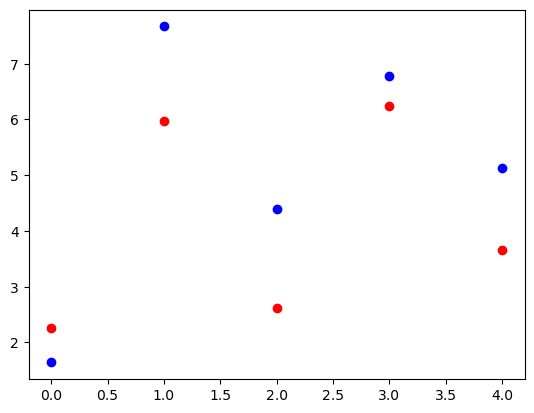

In [ ]:
error_segments = []
mean_values = []
median_values = []
mov_var_list = []
quartile_list = []

# Loop to create segments and calculate mean error angle and movement variability

for i in range(len(timestamps_baseline) - 1):

    start_index = int(timestamps_baseline[i])
    end_index = int(timestamps_baseline[i + 1])
    segment = baseline_data_2[0, start_index:end_index]
    segment = np.array(segment)

    mean_value_seg = np.nanmean(segment)
    mov_var_seg = np.nanstd(segment)
    median_seg = np.nanmedian(segment)
    
    error_segments.append(segment)
    mean_values.append(mean_value_seg)
    median_values.append(median_seg)
    mov_var_list.append(mov_var_seg)

mov_var_list_baseline2 = mov_var_list

plt.plot(mov_var_list_baseline1, 'ro')
plt.plot(mov_var_list_baseline2, 'bo')
plt.show()

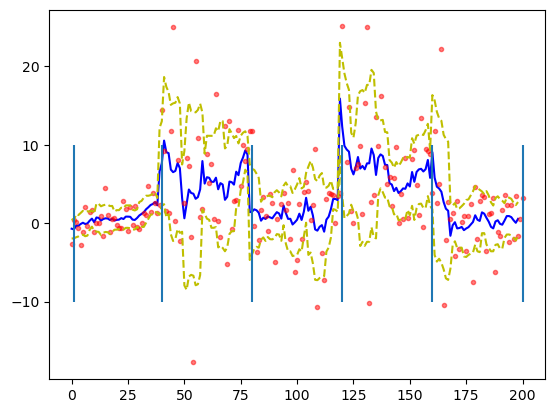

In [29]:
window_size = 4 #window size captures how many points are taken into account on each side of the data pt. to be smoothed
smoothed_baseline2_list = []
running_variances_basel2_list = []

for i in range(len(timestamps_baseline)-1):
    for t in range(timestamps_baseline[i],timestamps_baseline[i+1]):
        real_window_min = max([timestamps_baseline[i], t-window_size])
        real_window_max = min([timestamps_baseline[i+1],t+window_size])
    
        smoothed_baseline2 = np.nanmean(baseline_data_2[0,real_window_min:real_window_max])
        smoothed_baseline2_list.append(smoothed_baseline2)

        running_variance_basel2 = np.nanstd(baseline_data_2[0,real_window_min:real_window_max])
        running_variances_basel2_list.append(running_variance_basel2)

mplusv_basel2 = np.array(smoothed_baseline2_list) + np.array(running_variances_basel2_list)
mminusv_basel2 = np.array(smoothed_baseline2_list) - np.array(running_variances_basel2_list)

plt.plot(smoothed_baseline2_list, 'b-')
plt.plot(baseline_data_2[0,:], 'r.', alpha=0.5)
plt.plot(mplusv_basel2, 'y--')
plt.plot(mminusv_basel2, 'y--')
plt.vlines(timestamps_baseline, -10, 10)
plt.show()


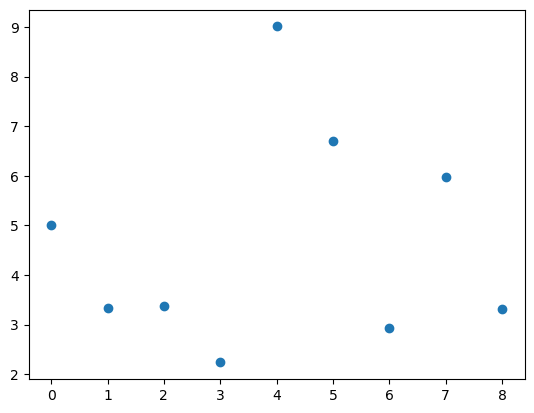

In [ ]:
# same for interference
error_segments = []
mean_values = []
median_values = []
mov_var_list = []
quartile_list = []

# Loop to create segments and calculate mean error angle and movement variability

for i in range(len(timestamps_interference) - 1):

    start_index = int(timestamps_interference[i]+1)
    end_index = int(timestamps_interference[i + 1])
    segment = interference_data_1[0, start_index:end_index]
    segment = np.array(segment)

    mean_value_seg = np.nanmean(segment)
    mov_var_seg = np.nanstd(segment)
    median_seg = np.nanmedian(segment)
    
    error_segments.append(segment)
    mean_values.append(mean_value_seg)
    median_values.append(median_seg)
    mov_var_list.append(mov_var_seg)

mov_var_list_interference1 = mov_var_list

plt.plot(mov_var_list_interference1, 'o')
plt.show()

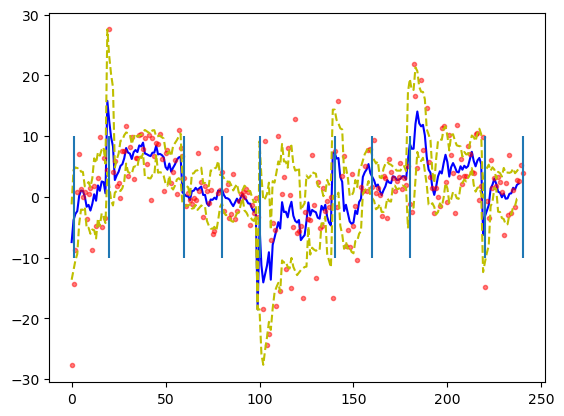

In [34]:
window_size = 3 #window size captures how many points are taken into account on each side of the data pt. to be smoothed
smoothed_interference1_list = []
running_variances_interference1_list = []

for i in range(len(timestamps_interference)-1):
    for t in range(timestamps_interference[i],timestamps_interference[i+1]):
        real_window_min = max([timestamps_interference[i], t-window_size])
        real_window_max = min([timestamps_interference[i+1],t+window_size])
    
        smoothed_interference1 = np.nanmean(interference_data_1[0,real_window_min:real_window_max])
        smoothed_interference1_list.append(smoothed_interference1)
        
        running_variance_interference1 = np.nanstd(interference_data_1[0,real_window_min:real_window_max])
        running_variances_interference1_list.append(running_variance_interference1)

mplusv_interference1 = np.array(smoothed_interference1_list) + np.array(running_variances_interference1_list)
mminusv_interference1 = np.array(smoothed_interference1_list) - np.array(running_variances_interference1_list)

plt.plot(smoothed_interference1_list, 'b-')
plt.plot(interference_data_1[0,:], 'r.', alpha=0.5)
plt.plot(mplusv_interference1, 'y--')
plt.plot(mminusv_interference1, 'y--')
plt.vlines(timestamps_interference, -10, 10)
plt.show()

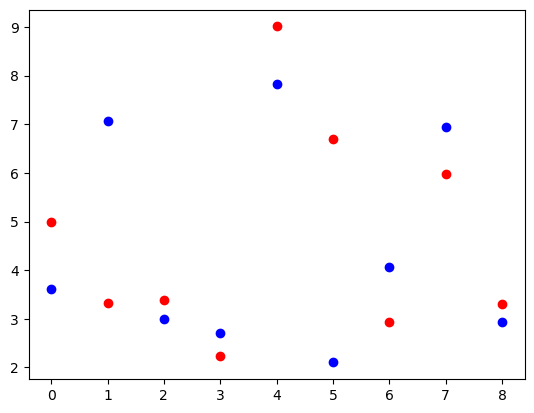

In [ ]:
# same for interference
error_segments = []
mean_values = []
median_values = []
mov_var_list = []
quartile_list = []

# Loop to create segments and calculate mean error angle and movement variability

for i in range(len(timestamps_interference) - 1):

    start_index = int(timestamps_interference[i]+1)
    end_index = int(timestamps_interference[i + 1])
    segment = interference_data_2[0, start_index:end_index]
    segment = np.array(segment)

    mean_value_seg = np.nanmean(segment)
    mov_var_seg = np.nanstd(segment)
    median_seg = np.nanmedian(segment)
    
    error_segments.append(segment)
    mean_values.append(mean_value_seg)
    median_values.append(median_seg)
    mov_var_list.append(mov_var_seg)

mov_var_list_interference2 = mov_var_list

plt.plot(mov_var_list_interference1, 'ro')
plt.plot(mov_var_list_interference2, 'bo')
plt.show()

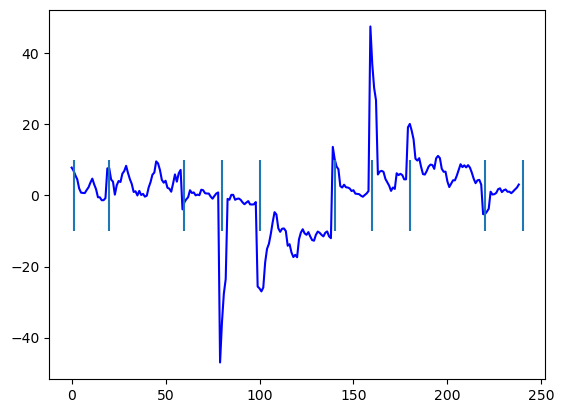

In [37]:
window_size = 3 #window size captures how many points are taken into account on each side of the data pt. to be smoothed
smoothed_interference2_list = []
running_variances_interference2_list = []

for i in range(len(timestamps_interference)-1):
    for t in range(timestamps_interference[i],timestamps_interference[i+1]):
        real_window_min = max([timestamps_interference[i], t-window_size])
        real_window_max = min([timestamps_interference[i+1],t+window_size])
    
        smoothed_interference2 = np.nanmean(interference_data_2[0,real_window_min:real_window_max])
        smoothed_interference2_list.append(smoothed_interference2)
        
        running_variance_interference2 = np.nanstd(interference_data_2[0,real_window_min:real_window_max])
        running_variances_interference2_list.append(running_variance_interference2)

mplusv_interference2 = np.array(smoothed_interference2_list) + np.array(running_variances_interference2_list)
mminusv_interference2 = np.array(smoothed_interference2_list) - np.array(running_variances_interference2_list)

plt.plot(smoothed_interference2_list, 'b-')
#plt.plot(interference_data_2[0,:], 'r.', alpha=0.5)
#plt.plot(mplusv_interference2, 'y--')
#plt.plot(mminusv_interference2, 'y--')
plt.vlines(timestamps_interference, -10, 10)
plt.show()